**This demo uses dataset of raw T1 structual MRI images. ABIDEII dataset.**


- 10% for test, 90% for training.<p>
- final input dimension: (67,67,67), pixdim = (4,4,4)


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
import sys
sys.path.append("..")
from preprocess import *
from dev_tools.my_tools import *
from dev_tools.model_tools import *

# The raw image

## Some images looks like this:

0.0
1555465.6
0.0


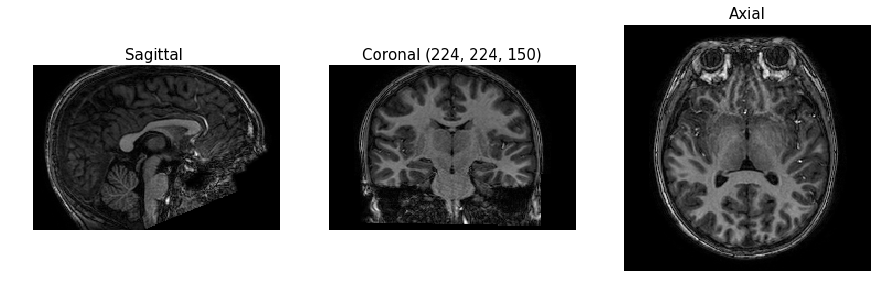

In [9]:
nii_img = nib.load('/media/woody/Elements/age_data/ABIDE_II/anat_data/29480.nii.gz')
npy_img = nii_img.get_data()
print2d(npy_img)

## It goes through the resampling and padding process

0.01916648613083632
1.0
0.0


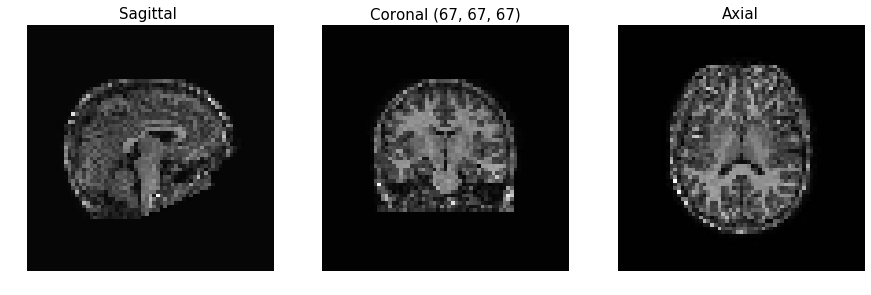

In [10]:
crop_padded_img = np.load('./data_npy/origin/29480.npy')
print2d(crop_padded_img)


## The mean image of all the training data is computed and is subtracted from all training and test data.
It is worth noting that the test data does not contribute to the mean image. This is because the training data, and only training data, needs to have zero mean for better training performance.
## How does the mean values look like:

0.06631996258157008
0.3776433482499463
0.06610547298431554
0.03443296900534126
0.21095084554773103
0.03373808121520518


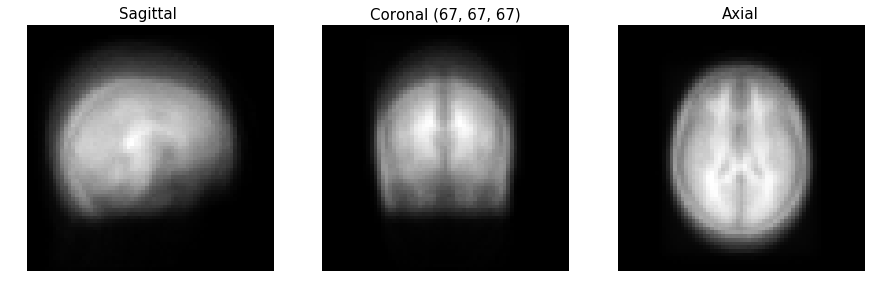

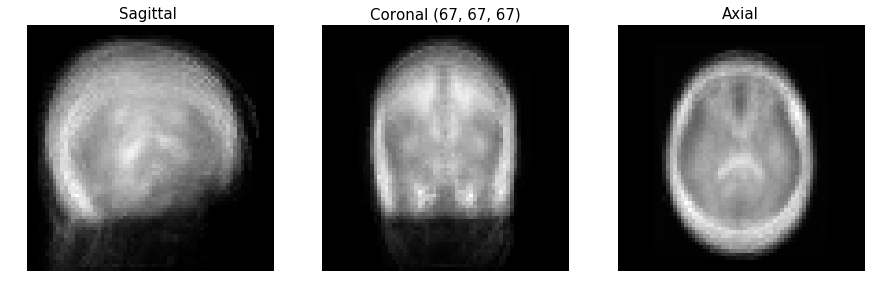

In [19]:
mean_npy = np.load('./data_npy/mean_npy.npy')
print2d(mean_npy)
std_npy = np.load('./data_npy/std_npy.npy')
print2d(std_npy)

## Finally, the images fed into the model look like this:

-1.3694281327706386
7.000582955287057
-2.451056698459304


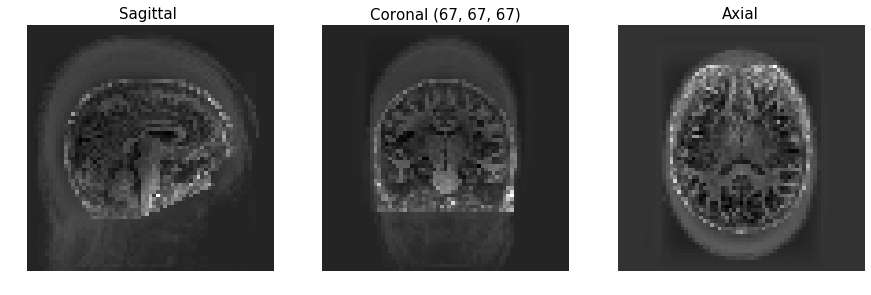

In [12]:
final_img = np.load('./data_npy/mean_subtracted/29480.npy')
print2d(final_img)

# Training and test results

- The validation uses the test dataset.

- Our model uses 3D-CNN with dropout, batch normalization and L2 regularization.
- Target model uses 3D-CNN with dropout.

The training process of Woody's model


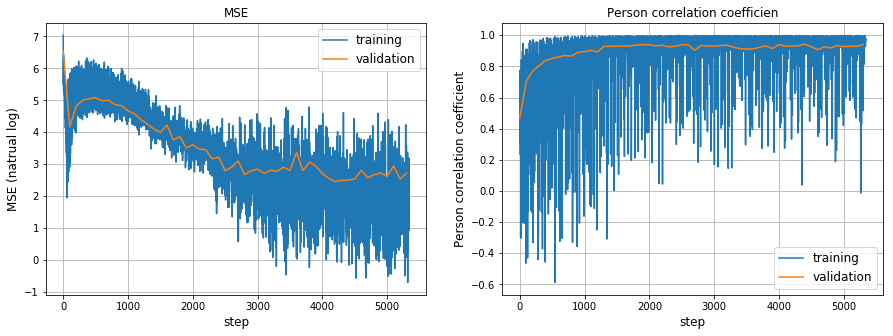

In [13]:
draw_training_proc('./img/training_return_list_woody.npy')
print('The training process of Woody\'s model')

The training process of Zach's modle


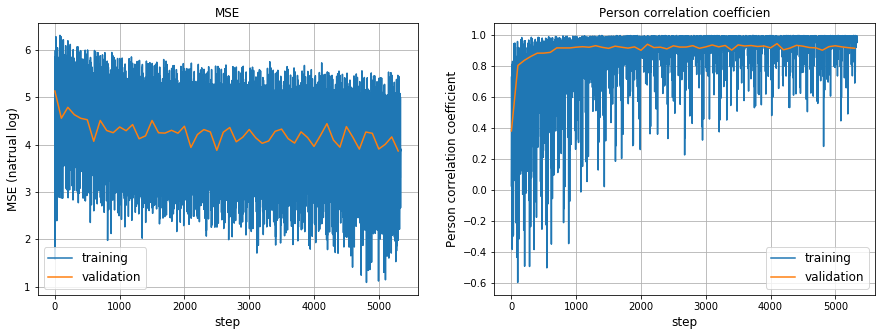

In [16]:
draw_training_proc('./img/training_return_list_zach.npy')
print('The training process of Zach\'s modle')

## Let's check the correlation between the predicted age and the chronological age.

Model woody, best MSE


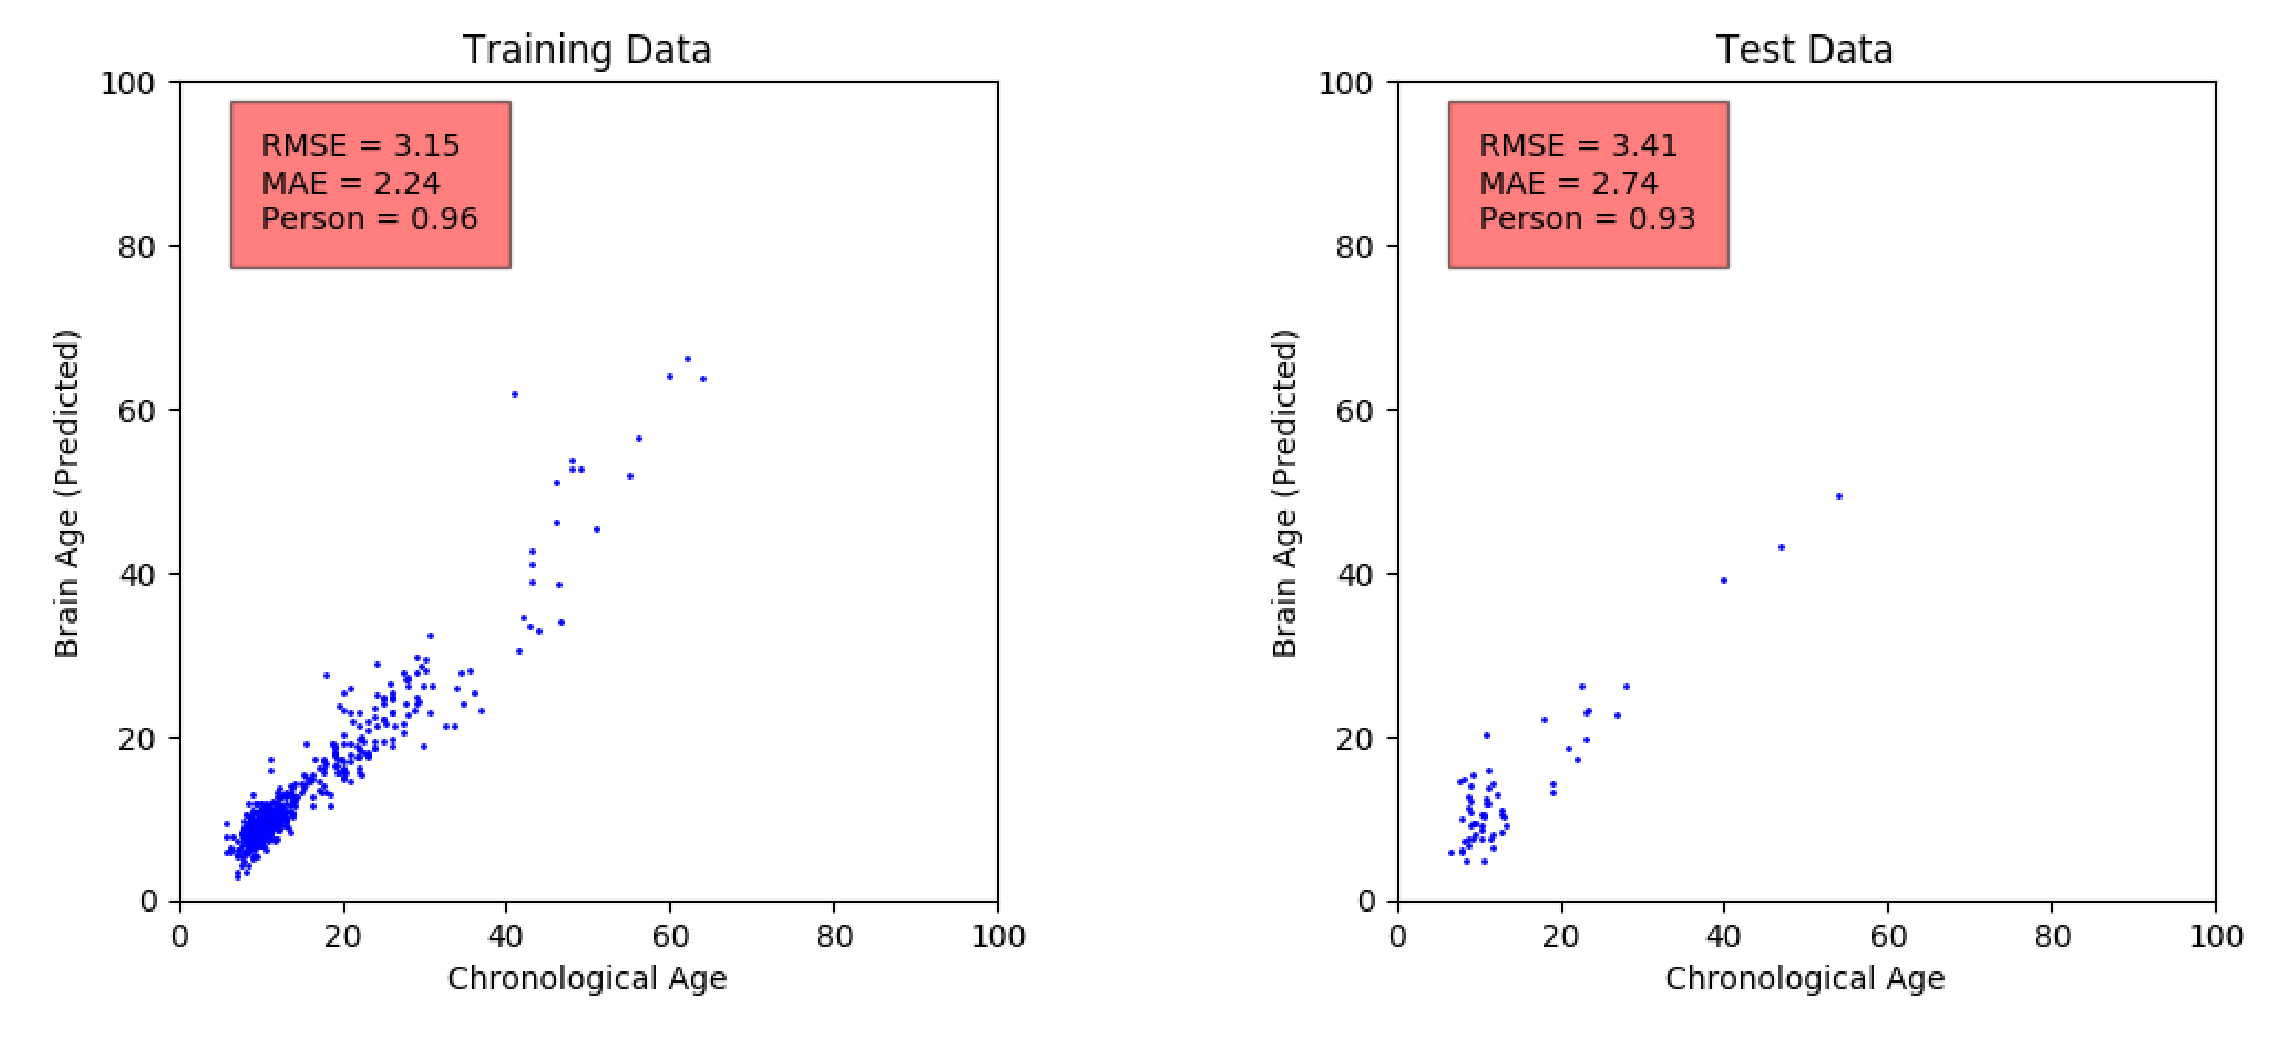

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,20))
ax1.imshow(plt.imread('./img/training_corr_mse_woody.pdf.png'))
ax1.axis('off')
# ax1.set_title('Training dataset',fontsize=40)
ax2.imshow(plt.imread('./img/test_corr_mse_woody.pdf.png'))
ax2.axis('off')
# ax2.set_title('Test dataset',fontsize=40)
print('Model woody, best MSE')

Model woody, best Person


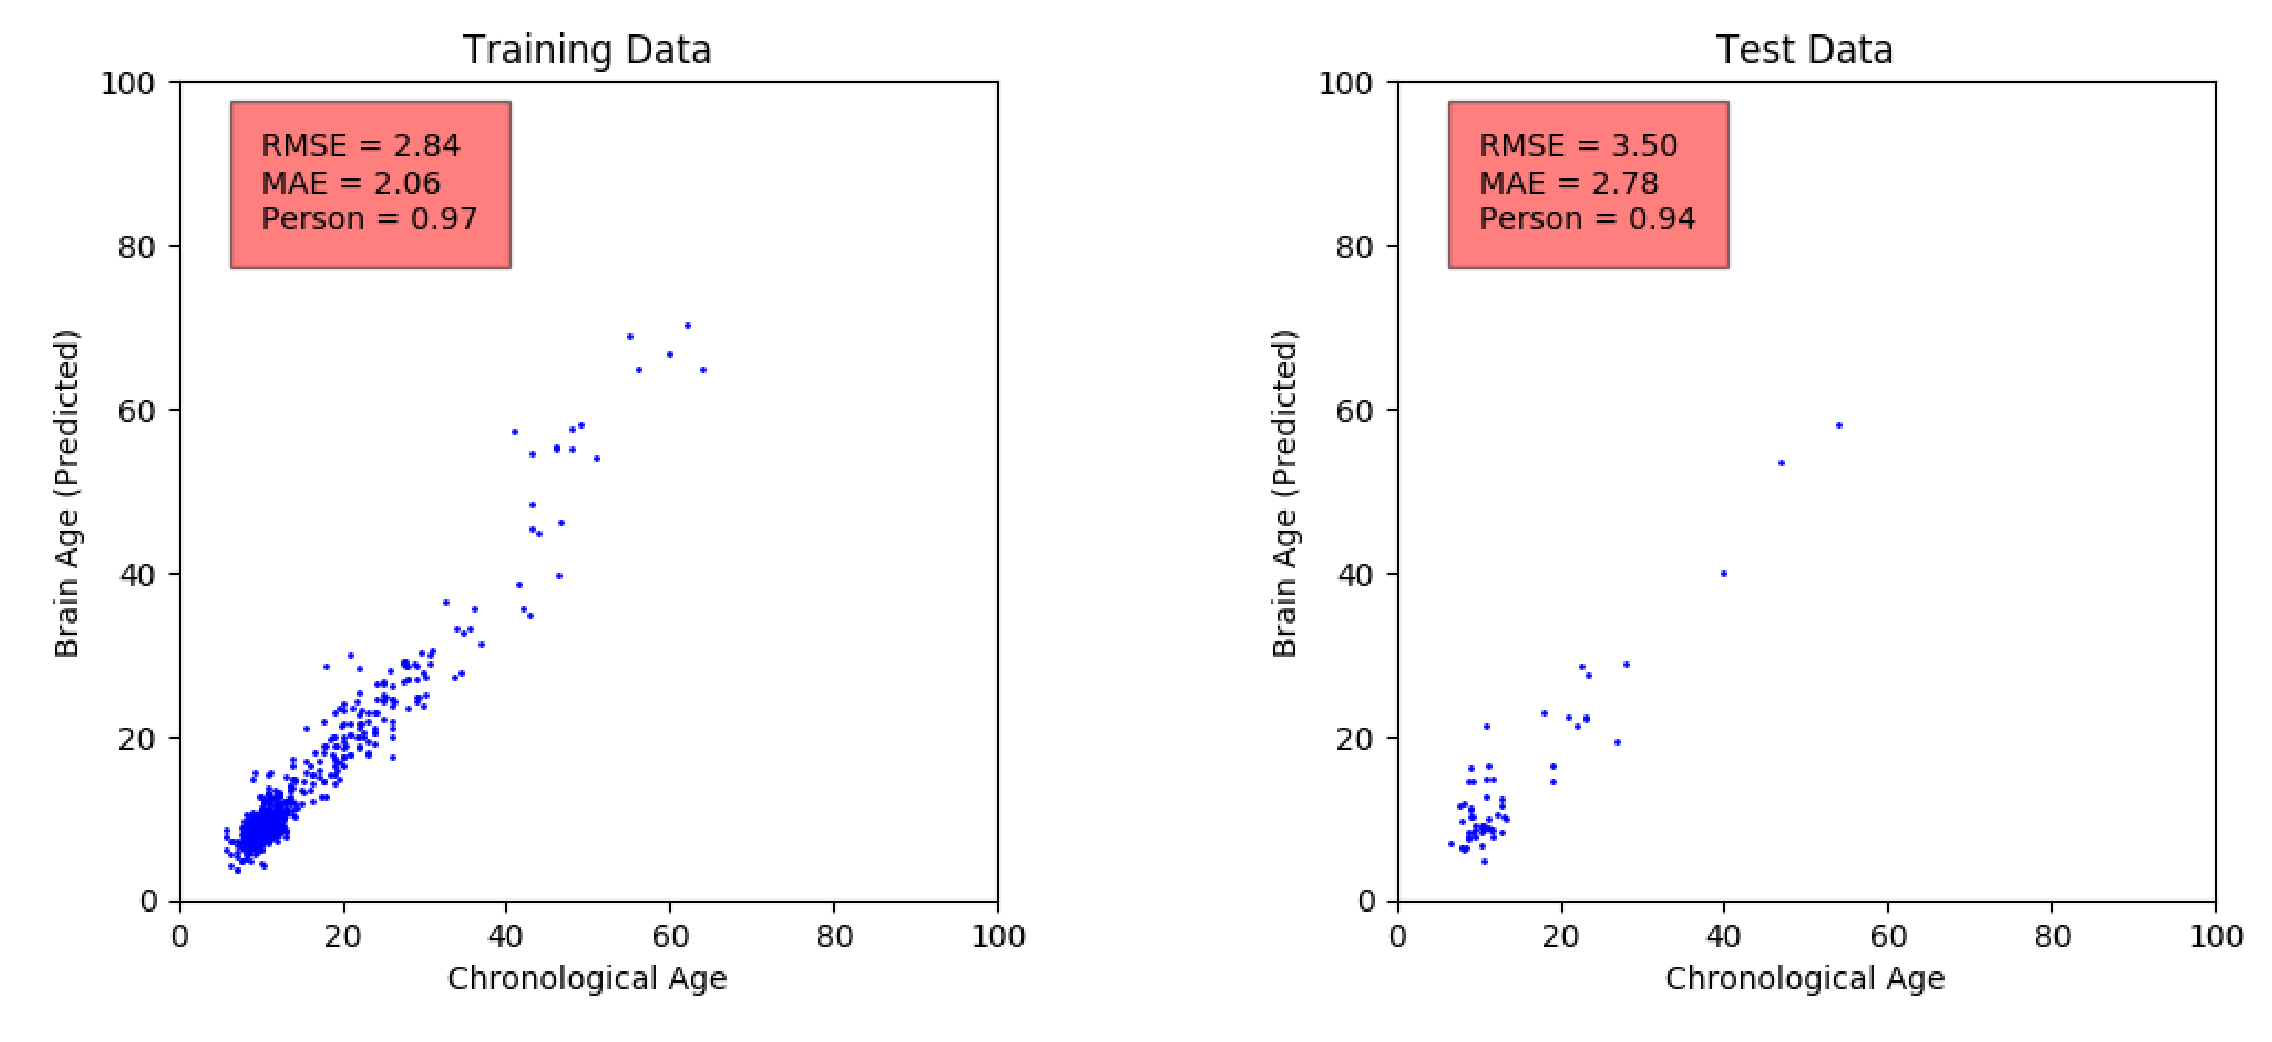

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,20))
ax1.imshow(plt.imread('./img/training_corr_person_woody.pdf.png'))
ax1.axis('off')
# ax1.set_title('Training dataset',fontsize=40)
ax2.imshow(plt.imread('./img/test_corr_person_woody.pdf.png'))
ax2.axis('off')
# ax2.set_title('Test dataset',fontsize=40)
print('Model woody, best Person')

Model zach, best MSE


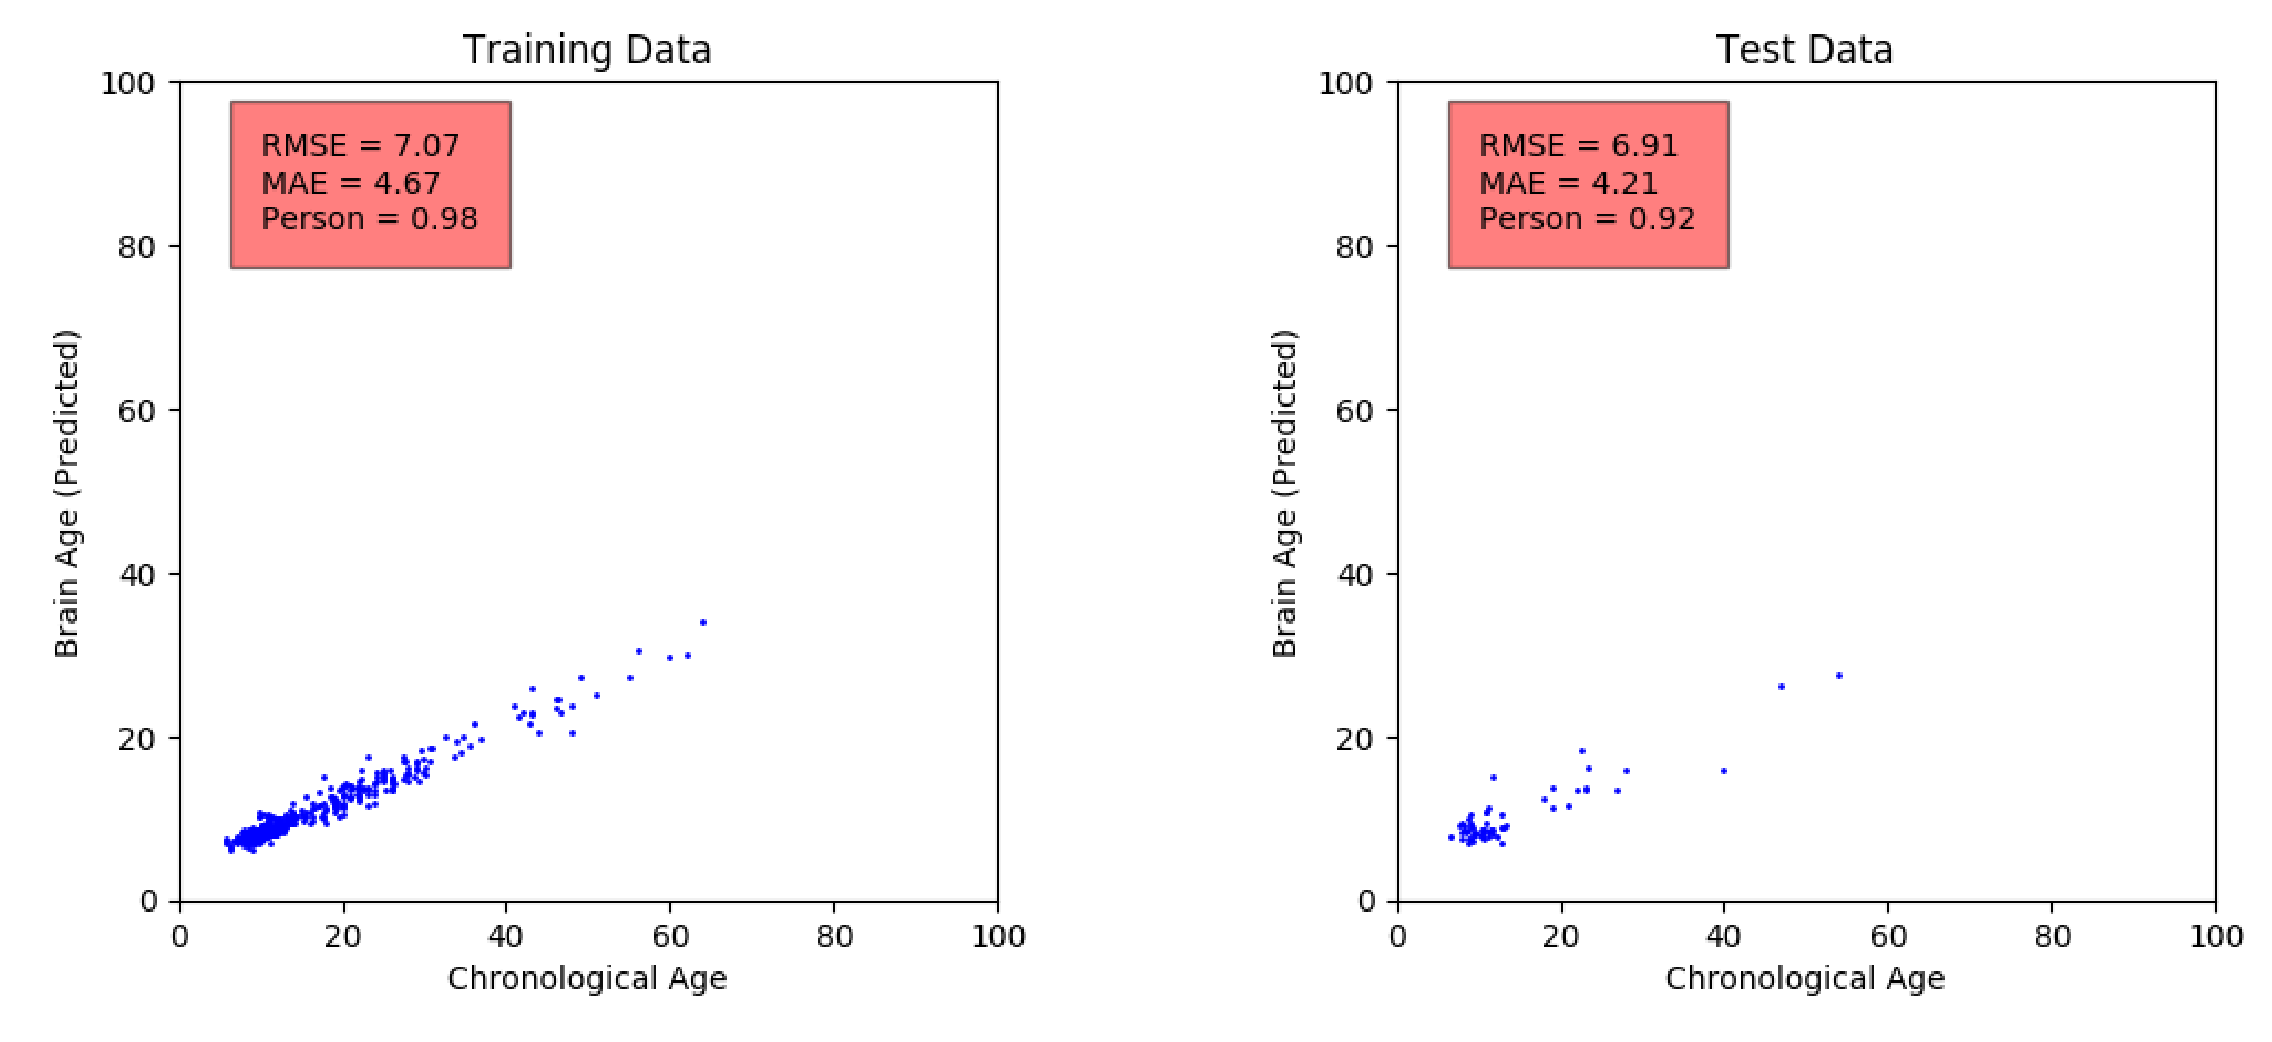

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,20))
ax1.imshow(plt.imread('./img/training_corr_mse_zach.pdf.png'))
ax1.axis('off')
# ax1.set_title('Training dataset',fontsize=40)
ax2.imshow(plt.imread('./img/test_corr_mse_zach.pdf.png'))
ax2.axis('off')
# ax2.set_title('Test dataset',fontsize=40)
print('Model zach, best MSE')

Model zach, best Person


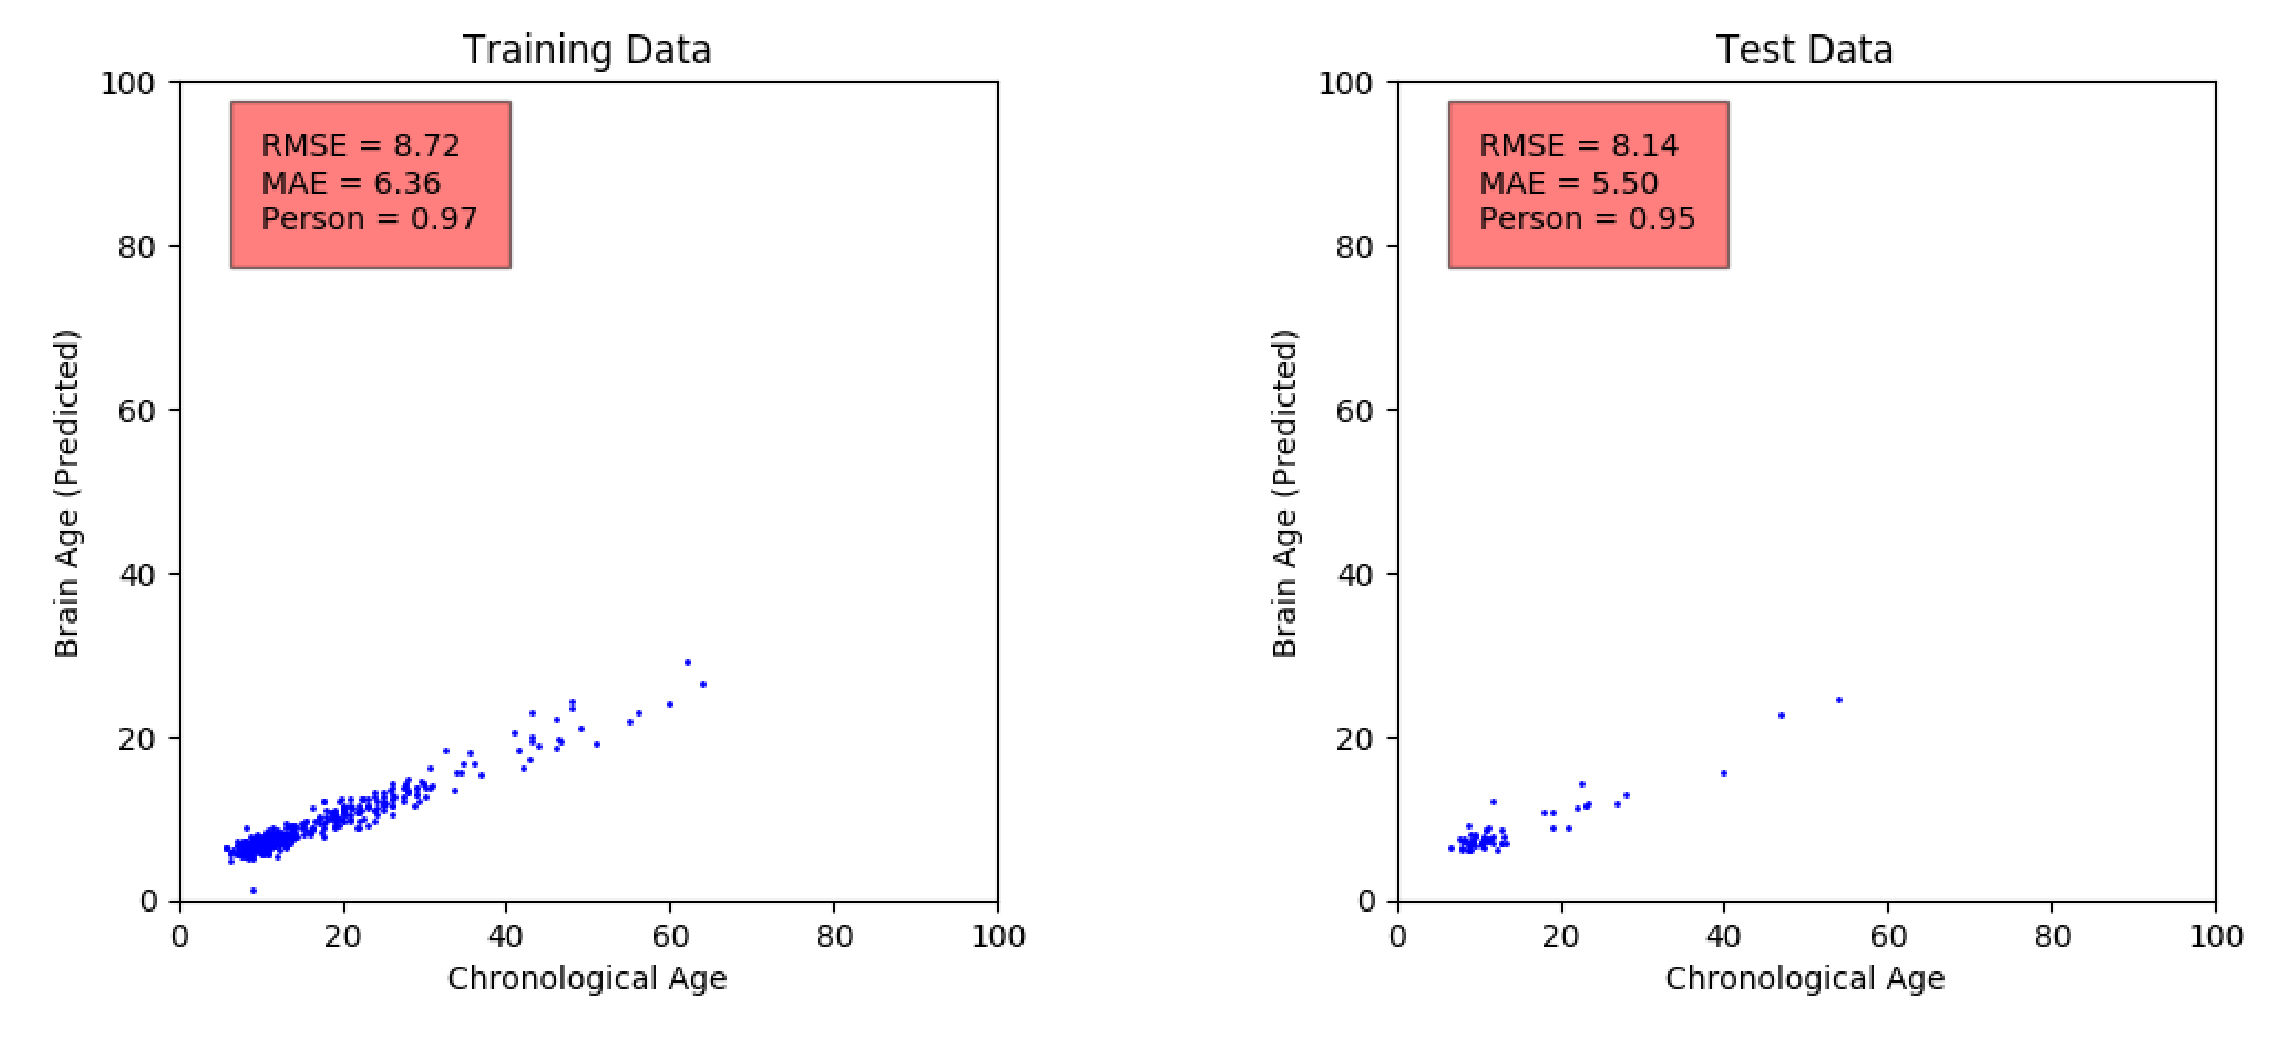

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,20))
ax1.imshow(plt.imread('./img/training_corr_person_zach.pdf.png'))
ax1.axis('off')
# ax1.set_title('Training dataset',fontsize=40)
ax2.imshow(plt.imread('./img/test_corr_person_zach.pdf.png'))
ax2.axis('off')
# ax2.set_title('Test dataset',fontsize=40)
print('Model zach, best Person')

# Conclusion
The mean absolute error may be better.


# Appendix:
Predicted age of some test subjects.